In [22]:
from __future__ import absolute_import, division, print_function, unicode_literals
import cv2
!pip install -q tensorflow-gpu==2.0.0-rc1
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
size = 24 #기본 = 28
size3 = 24

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

i=0
x_train2 = np.zeros((60000,size,size))
x_test2 = np.zeros((10000,size,size))
while(i<60000):
  x_train2[i] = (cv2.resize(x_train[i], dsize=(size, size), fx=0, fy=0, interpolation=cv2.INTER_CUBIC))
  i = i+1
i=0
while(i<10000):
  x_test2[i] = (cv2.resize(x_test[i], dsize=(size, size), fx=0, fy=0, interpolation=cv2.INTER_CUBIC))
  i = i+1

i=0
x_train2 = np.zeros((60000,size,size))
x_test2 = np.zeros((10000,size,size))
while(i<60000):
  x_train2[i] = (cv2.resize(x_train[i], dsize=(size, size), fx=0, fy=0, interpolation=cv2.INTER_CUBIC))
  i = i+1
i=0
while(i<10000):
  x_test2[i] = (cv2.resize(x_test[i], dsize=(size, size), fx=0, fy=0, interpolation=cv2.INTER_CUBIC))
  i = i+1


x_train2, x_test2 = x_train2 / 255.0, x_test2 / 255.0


x_train2 = x_train2.reshape(x_train2.shape[0], size, size, 1)
x_test2 = x_test2.reshape(x_test2.shape[0], size, size, 1)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(size, size, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))




model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(x_train2, y_train, epochs=5)

model.evaluate(x_test2,  y_test, verbose=2)



Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3294 - accuracy: 0.9054
Epoch 2/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.1576 - accuracy: 0.9534
Epoch 3/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.1179 - accuracy: 0.9641
Epoch 4/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0963 - accuracy: 0.9702
Epoch 5/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0815 - accuracy: 0.9753
10000/1 - 1s - loss: 0.0382 - accuracy: 0.9771


[0.0744081754884217, 0.9771]

In [103]:
x_train2.shape

(60000, 28, 28)

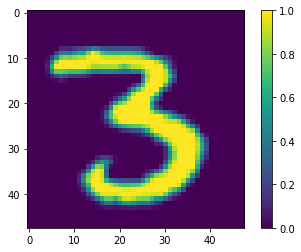

In [13]:
import matplotlib.pyplot as plt




x_train2[10000].shape
plt.figure()
plt.imshow(x_train2[12]) #INTER_LANCZOS4, INTER_CUBIC 둘중 하나 선택 
plt.colorbar()
plt.grid(False)
plt.show()